In [1]:
print("Installing packages...")
!pip install hypopt tensorflowjs > /dev/null
print("Downloading files...")
!wget https://www.dropbox.com/s/fedqcdt4o0m2oxp/X.npy &> /dev/null
!wget https://www.dropbox.com/s/h7xh92w1w7px30a/X_g.npy &> /dev/null
!wget https://www.dropbox.com/s/grn9brfvzx74c8a/y.npy &> /dev/null
print("Importing stuff...")
import os
os.makedirs("static/js", exist_ok=True)
!wget -O static/js/skin_cancer_diagnosis_script.js 'https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20Scholars/Sessions%206%20-%2010%20(Projects)/Project%20-%20(Healthcare%20B)%20Skin%20Cancer%20Diagnosis/skin_cancer_diagnosis_script.js' &> /dev/null
output = 'static/js/skin_cancer_diagnosis_script.js'

from google.colab.output import eval_js

import time
start_time = time.time()

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tqdm.notebook import tqdm
from tensorflow.keras import optimizers

import keras
from keras import backend as K
from tensorflow.keras.layers import *
from keras.models import Sequential
from keras.layers import Dense, Conv2D
from keras.layers import Activation, MaxPooling2D, Dropout, Flatten, Reshape
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import rmsprop_v2

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import os
import random
from PIL import Image
import gdown

import argparse
import numpy as np
from keras.layers import Conv2D, Input, BatchNormalization, LeakyReLU, ZeroPadding2D, UpSampling2D
from keras.layers.merge import add, concatenate
from keras.models import Model
import struct
from google.colab.patches import cv2_imshow
from copy import deepcopy
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_auc_score
from sklearn.base import BaseEstimator

from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from keras.applications.mobilenet import MobileNet




from hypopt import GridSearch

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

import cv2


import tensorflowjs as tfjs

from google.colab import files

import requests, io, zipfile
import os



import os.path
from os import path




print("Done!")

Installing packages...
Importing stuff...
Done!


In [2]:
IMG_WIDTH = 100
IMG_HEIGHT = 75

In [3]:
X = np.load("X.npy")
X_g = np.load("X_g.npy")
y = np.load("y.npy")

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)
X_g_train, X_g_test, y_train, y_test = train_test_split(X_g, y, test_size=0.4, random_state=101)

X_augmented = []
X_g_augmented = []

y_augmented = []

for i in tqdm(range(len(X_train))):
  transform = random.randint(0,1)
  if (transform == 0):
    # Flip the image across the y-axis
    X_augmented.append(cv2.flip(X_train[i],1))
    X_g_augmented.append(cv2.flip(X_g_train[i],1))
    y_augmented.append(y_train[i])
  else:
    # Zoom 33% into the image
    zoom = 0.33

    centerX,centerY=int(IMG_HEIGHT/2),int(IMG_WIDTH/2)
    radiusX,radiusY= int((1-zoom)*IMG_HEIGHT*2),int((1-zoom)*IMG_WIDTH*2)

    minX,maxX=centerX-radiusX,centerX+radiusX
    minY,maxY=centerY-radiusY,centerY+radiusY

    cropped = (X_train[i])[minX:maxX, minY:maxY]
    new_img = cv2.resize(cropped, (IMG_WIDTH, IMG_HEIGHT))
    X_augmented.append(new_img)

    cropped = (X_g_train[i])[minX:maxX, minY:maxY]
    new_img = cv2.resize(cropped, (IMG_WIDTH, IMG_HEIGHT))
    X_g_augmented.append(new_img)

    y_augmented.append(y_train[i])

X_augmented = np.array(X_augmented)
X_g_augmented = np.array(X_g_augmented)

y_augmented = np.array(y_augmented)

X_train = np.vstack((X_train,X_augmented))
X_g_train = np.vstack((X_g_train,X_g_augmented))

y_train = np.append(y_train,y_augmented)

  0%|          | 0/580 [00:00<?, ?it/s]

In [6]:
def CNNClassifier(epochs=40, batch_size=10, layers=5, dropout=0.5, activation='relu'):
  def set_params():
    i = 1  
  def create_model():
    model = Sequential()
    
    for i in range(layers):
      model.add(Conv2D(64, (3, 3), padding='same'))
      model.add(Activation(activation))
    
    model.add(Conv2D(64, (3, 3)))
    model.add(Activation(activation))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(dropout / 2.0))

    model.add(Conv2D(128, (3, 3), padding='same'))
    model.add(Activation(activation))
    model.add(Conv2D(128, (3, 3)))
    model.add(Activation(activation))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(dropout / 2.0))

    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation(activation))
    model.add(Dropout(dropout))
    model.add(Dense(7))
    model.add(Activation('softmax'))

    # initiate RMSprop optimizer
    #opt = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)

    # Let's train the model using RMSprop
    model.compile(loss='categorical_crossentropy',
                  optimizer=tf.keras.optimizers.RMSprop(lr=0.0001, decay=1e-6),
                  metrics=[tf.keras.metrics.AUC()])
    return model
  return KerasClassifier(build_fn=create_model, epochs=epochs, batch_size=batch_size, verbose=1)

In [7]:
y_train_onehot = np.zeros((y_train.size, y_train.max().astype(int)+1))
y_train_onehot[np.arange(y_train.size),y_train.astype(int)] = 1

y_test_onehot = np.zeros((y_test.size, y_test.max().astype(int)+1))
y_test_onehot[np.arange(y_test.size),y_test.astype(int)] = 1

In [8]:
cnn = CNNClassifier()

cnn.fit(X_train.astype(np.float32), y_train_onehot.astype(np.float32),
        validation_data=(X_test.astype(np.float32),y_test_onehot.astype(np.float32))
        ,verbose=1)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/40
116/116 [==============================] - 45s 120ms/step - loss: 3.0184 - auc: 0.6128 - val_loss: 1.7830 - val_auc: 0.7194
Epoch 2/40
116/116 [==============================] - 13s 114ms/step - loss: 1.6473 - auc: 0.7488 - val_loss: 1.5301 - val_auc: 0.7929
Epoch 3/40
116/116 [==============================] - 13s 114ms/step - loss: 1.4073 - auc: 0.8297 - val_loss: 1.4544 - val_auc: 0.8184
Epoch 4/40
116/116 [==============================] - 13s 114ms/step - loss: 1.3043 - auc: 0.8623 - val_loss: 1.5442 - val_auc: 0.8160
Epoch 5/40
116/116 [==============================] - 13s 114ms/step - loss: 1.2312 - auc: 0.8758 - val_loss: 1.3173 - val_auc: 0.8623
Epoch 6/40
116/116 [==============================] - 13s 115ms/step - loss: 1.0501 - auc: 0.9105 - val_loss: 1.3122 - val_auc: 0.8633
Epoch 7/40
116/116 [==============================] - 13s 114ms/step - loss: 0.9761 - auc: 0.9230 - val_loss: 1.2332 - val_auc: 0.8739
Epoch 8/40
116/116 [==============================] - 1

In [9]:
cnn.model.save("model.h5")

In [10]:
def model_stats(name, y_test, y_pred, y_pred_proba):
  cm = confusion_matrix(y_test, y_pred)

  print(name)

  accuracy = accuracy_score(y_test,y_pred)
  print ("The accuracy of the model is " + str(round(accuracy,5)))

  y_test_onehot = np.zeros((y_test.size, y_test.max().astype(int)+1))
  y_test_onehot[np.arange(y_test.size),y_test.astype(int)] = 1

  roc_score = roc_auc_score(y_test_onehot, y_pred_proba)

  print ("The ROC AUC Score of the model is " + str(round(roc_score,5)))
  
  return cm

In [11]:
y_pred = cnn.predict(X_test)
y_pred_proba = cnn.predict_proba(X_test)

cnn_cm = model_stats("CNN",y_test,y_pred,y_pred_proba)

CNN
The accuracy of the model is 0.55556
The ROC AUC Score of the model is 0.8528


In [12]:
def plot_cm(name, cm):
  classes = ['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']

  df_cm = pd.DataFrame(cm, index = [i for i in classes], columns = [i for i in classes])
  df_cm = df_cm.round(5)

  plt.figure(figsize = (12,8))
  sns.heatmap(df_cm, annot=True, fmt='g')
  plt.title(name + " Model Confusion Matrix")
  plt.xlabel("Predicted Label")
  plt.ylabel("True Label")
  plt.show()

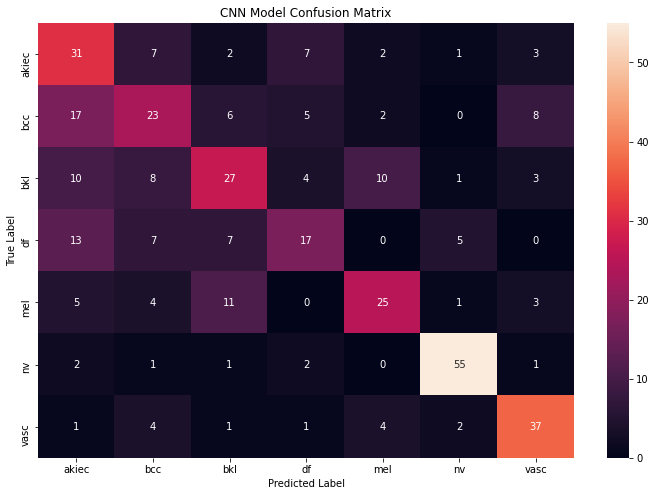

In [14]:
plot_cm("CNN", cnn_cm)